# Python final project : Drug Consumption Analysis & Predictions
## Data Set Information:
There are 1885 responders in the database. Twelve characteristics are known for each respondent: NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), as well as education, age, gender, country of residence, and ethnicity, are used to assess personality.


---


Participants were also asked about their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepines, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine, and volatile substance abuse) as well as one fictitious drug (Semeron) that was used to identify over-claimers.

They had to choose between 'Never Used,' 'Over a Decade Ago,' 'Last Decade,' 'Last Year,' 'Last Month,' 'Last Week,' and 'Last Day' for each drug.



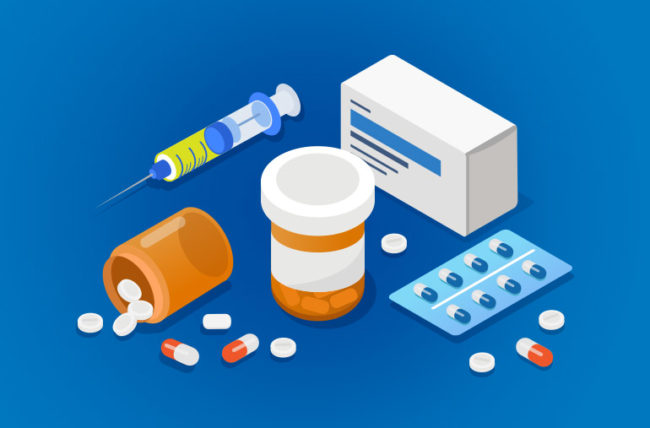

### Here you can find a more described version of the dataset :

**Age (age of participant):** 
* -0.95197 18-24 
* -0.07854 25-34 
* 0.49788 35-44 
* 1.09449 45-54 
* 1.82213 55-64 
* 2.59171 65+ 

**Gender (gender of participant):**
* 0.48246 Female 
*-0.48246 Male 


*Education (level of education of participant):*
* -2.43591 Left school before 16 years 
* -1.73790 Left school at 16 years 
* -1.43719 Left school at 17 years 
* -1.22751 Left school at 18 years 
* -0.61113 Some college or university, no certificate or degree 
* -0.05921 Professional certificate/ diploma 
* 0.45468 University degree 
* 1.16365 Masters degree 
* 1.98437 Doctorate degree 

**Country (country of current residence of participant):**
* -0.09765 Australia 
* 0.24923 Canada 
* -0.46841 New Zealand 
* -0.28519 Other 
* 0.21128 Republic of Ireland 20 
* 0.96082 UK 1044 
* -0.57009 USA 557 

**Ethnicity (ethnicity of participant):**
* -0.50212 Asian  
* -1.10702 Black 
* 1.90725 Mixed-Black/Asian 
* 0.12600 Mixed-White/Asian 
* -0.22166 Mixed-White/Black 
* 0.11440 Other 
* -0.31685 White 

The Revised NEO Personality Inventory (NEO PI-R) is a personality inventory that examines a person's Big Five personality traits (openness to experience, conscientiousness, extraversion, agreeableness, and neuroticism).
* **Nscore** is the long-term tendency to experience negative emotions such as nervousness, tension, anxiety and depression
* **Escore** is manifested in outgoing, warm, active, assertive, talkative, cheerful, and in search of stimulation characteristics
* **Oscore** is the general appreciation for art, unusual ideas, and imaginative, creative, unconventional, and wide interests
* **Ascore** is the dimension of interpersonal relations, characterized by altruism, trust, modesty, kindness, compassion and cooperativeness
* **Cscore** is the tendency to be organized and dependable, strong-willed, persistent, reliable, and efficient

**Impulsive** is impulsiveness measured by BIS-11: The Barratt Impulsiveness Scale is a widely used measure of impulsiveness


**SS** is impulsive sensation seeing measured by ImpSS.


**Drugs** 


Consumption :
> * CL0 Never Used 
* CL1 Used over a Decade Ago 
* CL2 Used in Last Decade 
* CL3 Used in Last Year 
* CL4 Used in Last Month 
* CL5 Used in Last Week 
* CL6 Used in Last Day 

* **Alcohol** is class of alcohol consumption.
* **Amphet** is class of amphetamines consumption. 
* **Amyl** is class of amyl nitrite consumption.
* **Benzos** is class of benzodiazepine consumption.
* **Caff** is class of caffeine consumption.
* **Cannabis** is class of cannabis consumption. 
* **Choc** is class of chocolate consumption.
* **Coke** is class of cocaine consumption.( same CL distribution)
* **Crack** is class of crack consumption. 
* **Ecstasy** is class of ecstasy consumption. 
* **Heroin** is class of heroin consumption. 
* **Ketamine** is class of ketamine consumption.
* **Legalh** is class of legal highs consumption.
* **LSD** is class of alcohol consumption.
* **Meth** is class of methadone consumption. 
* **Mushrooms** is class of magic mushrooms consumption.
* **Nicotine** is class of nicotine consumption. 
* **Semer** is class of fictitious drug Semeron consumption. 
* **VSA** is class of volatile substance abuse consumption.


In this project we are going to explore the UCI Dataset and train machine learning model to select some features/ caracteristics that may drive to illegal drugs consumption.

# Import DataSet ⌛

First let's import some essential libraries for cleaning, visualization and machine learning.

In [1]:
#Import Packages
# essential libraries
import json
import random
from urllib.request import urlopen

# storing and anaysis
import numpy as np
import pandas as pd
import random 
import math

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
!pip install pywaffle
from pywaffle import Waffle

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   
from sklearn.preprocessing import LabelEncoder

# hide warnings
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 565 kB 27.8 MB/s 


Now we import our dataset :

In [2]:
#importation method 
path =  'https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data'
title=['ID','Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS','Alchool','Amphet',' Amyl','Benzos','Caff','Canabis','Choc','Coke','Crack','Extasy','Heroin','Ketamine','Leghal','LSD','Meth','Mushrooms','Nicotine','sumer','VSA']
drug_consumption = pd.read_csv(path,sep=',',names=title)
drug_consumption.head()

ID      Age   Gender  Education  Country  ...  Meth  Mushrooms  Nicotine  sumer  VSA
0   1  0.49788  0.48246   -0.05921  0.96082  ...   CL0        CL0       CL2    CL0  CL0
1   2 -0.07854 -0.48246    1.98437  0.96082  ...   CL3        CL0       CL4    CL0  CL0
2   3  0.49788 -0.48246   -0.05921  0.96082  ...   CL0        CL1       CL0    CL0  CL0
3   4 -0.95197  0.48246    1.16365  0.96082  ...   CL0        CL0       CL2    CL0  CL0
4   5  0.49788  0.48246    1.98437  0.96082  ...   CL0        CL2       CL2    CL0  CL0

[5 rows x 32 columns]

In [3]:
drug_consumption.info()
drug_consumption.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alchool    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15   Amyl      1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Canabis    1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

ID         Age  ...    Impulsive           SS
count  1885.000000  1885.00000  ...  1885.000000  1885.000000
mean    945.294960     0.03461  ...     0.007216    -0.003292
std     545.167641     0.87836  ...     0.954435     0.963701
min       1.000000    -0.95197  ...    -2.555240    -2.078480
25%     474.000000    -0.95197  ...    -0.711260    -0.525930
50%     946.000000    -0.07854  ...    -0.217120     0.079870
75%    1417.000000     0.49788  ...     0.529750     0.765400
max    1888.000000     2.59171  ...     2.901610     1.921730

[8 rows x 13 columns]

Our dataset is made of 31 columns and 1885 rows. In the 31 columns, 18 are drugs, 7 are personality traits and 5 are demographic types.

# Explore the Data 🔍

## Preparing our dataset for Vizualisation

For the exploration of the dataset, we create categories from our columns :

*   demographic
*   personality
*   legal drugs
*   illegal drugs



In [4]:
demographic_columns = ['Age','Gender','Education','Country','Ethnicity']

personality_columns = ['Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS']

feature_columns = demographic_columns + personality_columns

drugs_columns = ['Alchool','Amphet',' Amyl','Benzos','Caff','Canabis','Choc','Coke','Crack','Extasy','Heroin','Ketamine','Leghal','LSD','Meth','Mushrooms','Nicotine','sumer','VSA']

drugs_legal = ['Alchool', 'Caff', 'Choc', 'Nicotine']

drugs_illegal = list(set(drugs_columns) - set(drugs_legal))

all_columns = feature_columns + drugs_columns

Because our dataset was already filled in with numerical values, we have to convert them to arguments to get a better visualization of the embedded informations.

In [5]:
#dictionnary for the usage of drugs
using_dictionnary={
    'CL0': 'Never Used',
    'CL1': 'Used over a Decade Ago',
    'CL2': 'Used in Last Decade',
    'CL3': 'Used in Last Year',
    'CL4': 'Used in Last Month',
    'CL5': 'Used in Last Week',
    'CL6': 'Used in Last Day',
}
#dictionnary for the education
education_dictionnary={
    -2.43591: 'Left school before 16 years',
    -1.73790: 'Left school at 16 years',
    -1.43719: 'Left school at 17 years',
    -1.22751: 'Left school at 18 years',
    -0.61113: 'Some college or university, no certificate or degree',
    -0.05921: 'Professional certificate/ diploma',
     0.45468: 'University degree',
     1.16365: 'Masters degree',
     1.98437: 'Doctorate degree',
}
#dictionnary for the countries
country_dictionnary={
    -0.09765: 'Australia',
    0.24923: 'Canada',
    -0.46841: 'New Zealand',
    -0.28519: 'Other',
    0.21128: 'Republic of Ireland',
    0.96082: 'UK',
    -0.57009: 'USA',
}
#dictionnary for the ethnicities
ethnicity_dictionnary={
    -0.50212: 'Asian',
    -1.10702: 'Black',
    1.90725: 'Mixed-Black/Asian',
    0.12600: 'Mixed-White/Asian',
    -0.22166: 'Mixed-White/Black',
     0.11440: 'Other',
    -0.31685: 'White',

}
#dictionnary for the ages
age_dictionnary={
    -0.95197: '18-24',
    -0.07854: '25-34',
    0.49788: '35-44',
    1.09449: '45-54',
    1.82213: '55-64',
    2.59171: '65+',
}
#dictionnary for the genders
gender_dictionnary={
    0.48246: 'Female',
    -0.48246: 'Male',

}
#dictionnary for splitting the drugs usage in two groups : User & Non-user
user_dictionnary={
    'CL6': 'User',
    'CL5': 'User',
    'CL4': 'User',
    'CL3': 'User',
    'CL2': 'Non-user',
    'CL1': 'Non-user',
    'CL0': 'Non-user',

}

Let's make a copy of our dataset, drug_consumption_viz, transforming our numerical values to categorical.

In [6]:
#Let's create the drug_consumption_viz dataset
drug_consumption_viz=drug_consumption.copy() 
drug_consumption_viz['Education'] = list(map(lambda x : education_dictionnary[round(x, 6)] ,drug_consumption['Education']))
drug_consumption_viz['Country'] = list(map(lambda x : country_dictionnary[round(x, 6)] ,drug_consumption['Country']))
drug_consumption_viz['Ethnicity'] = list(map(lambda x : ethnicity_dictionnary[round(x, 6)] ,drug_consumption['Ethnicity']))
drug_consumption_viz['Age'] = list(map(lambda x : age_dictionnary[round(x, 6)] ,drug_consumption['Age']))
drug_consumption_viz['Gender'] = list(map(lambda x : gender_dictionnary[round(x, 6)] ,drug_consumption['Gender']))


In [7]:
drug_consumption_viz.head()

ID    Age  Gender  ... Nicotine sumer  VSA
0   1  35-44  Female  ...      CL2   CL0  CL0
1   2  25-34    Male  ...      CL4   CL0  CL0
2   3  35-44    Male  ...      CL0   CL0  CL0
3   4  18-24  Female  ...      CL2   CL0  CL0
4   5  35-44  Female  ...      CL2   CL0  CL0

[5 rows x 32 columns]

## Examine the usage of drugs 

In [8]:
#library bokeh
from math import pi
from bokeh.palettes import Category20c
from bokeh.plotting import figure, show
from bokeh.transform import cumsum
from bokeh.io import output_notebook
from bokeh.resources import INLINE
output_notebook(INLINE)

drug_consumption_viz[drugs_columns[0]] = list(map(lambda x : using_dictionnary[x] ,drug_consumption[drugs_columns[0]])) # we map our numerical values to categorical using our dictionnary
data = drug_consumption_viz[drugs_columns[0]].value_counts().reset_index(name='value').rename(columns={'index': 'usage'}) #we reset and rename index for easier usage of the bokeh library
data['angle'] = data['value']/data['value'].sum() * 2*pi #angle of values we are going to plot 
data['color'] = Category20c[len(data)] #different colors for each value

#figure informations :
p = figure(height=350, title="Usage of Alchool", toolbar_location=None, tools="hover", tooltips="@usage: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),line_color="white", fill_color='color', legend_field='usage', source=data)

#plot figure
p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None
show(p)

We can observe that the Alchool consumption is mostly a daily up to a weekly consumption, which is not suprising for a legal drug. 

Let's examine now this use for all of the others drugs:

In [9]:
#for a better visualization, this method return the list of colors needed for each plot in function of the usage 
def get_liste_couleur(liste,couleur):
  color_output=[]
  for i in liste:
   for kv in color.items():
    if i==kv[0] : color_output.append(kv[1]) 
  return  color_output

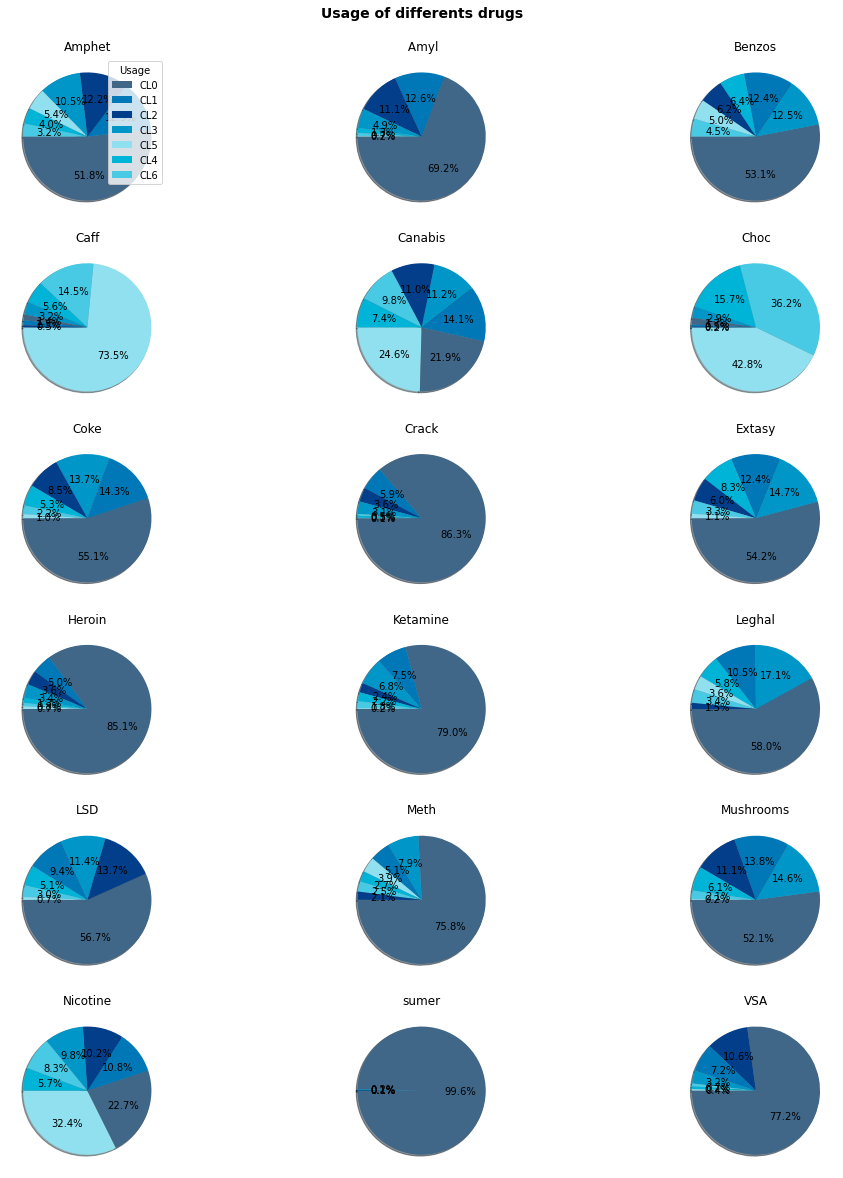

In [10]:
#multiplot with matplotlib
color= {'CL0':  '#406788',
           'CL1':  '#023e8a',
           'CL2':  '#0077b6',
           'CL3':  '#0096c7',
           'CL4':  '#00b4d8',
           'CL5':  '#48cae4',
           'CL6':  '#90e0ef'}
fig, axes = plt.subplots(6,3,figsize = (16,16))
fig.suptitle('Usage of differents drugs',fontsize=14, y=1.02,weight='black')  
#color=['#406788','#023e8a','#0077b6','#0096c7','#00b4d8','#48cae4','#90e0ef']
k=1
for i in range(6):
    for j in range(3):
        labels = drug_consumption[drugs_columns[k]].value_counts().index.tolist()
        axes[i][j].pie(x=drug_consumption[drugs_columns[k]].value_counts(), autopct='%.1f%%', shadow=True, startangle=180,colors=get_liste_couleur(labels,color))
        axes[i][j].set_title(drugs_columns[k])
        k+=1

axes[0][0].legend(title='Usage',labels=labels)
plt.tight_layout()
plt.show()


We can see that there is a few illegal drugs that have the highest rate of 'never used', such as Ketamine, Meth, Heroin and Crack with almost 80%. Otherwise, for each drugs almost half of the participants never tried it except for the canabis which only have ~22% of "Never used". In the legal drugs we can see that almost 75% of the participants have a daily use of Coffee which is interesting regarding the effect Coffe is well known for such as [" insomnia, nervousness, restlessness, nausea, increased heart rate, and other side effects. Larger doses might cause headache, anxiety, and chest pain "](https://www.webmd.com/vitamins/ai/ingredientmono-979/caffeine).

Let's split our data between user and non user for detecting the most used drugs.

In [11]:
#Splitting for each drugs the User/Non-user
for i in range(len(drugs_columns)):
  drug_consumption_viz[drugs_columns[i]] = list(map(lambda x : user_dictionnary[x] ,drug_consumption[drugs_columns[i]]))


In [12]:
output_notebook(INLINE)
data = drug_consumption_viz[drugs_columns[0]].value_counts().reset_index(name='value').rename(columns={'index': 'usage'}) #we reset and rename index for easier usage of the bokeh library
data['angle'] = data['value']/data['value'].sum() * 2*pi #angle of values we are going to plot 
data['color'] = ['#006d77','#83c5be'] #different colors for each value

#figure informations :
p = figure(height=350, title="Usage of Alchool User/Non-user", toolbar_location=None, tools="hover", tooltips="@usage: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),line_color="white", fill_color='color', legend_field='usage', source=data)

#plot figure
p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None
show(p)

As seen previously , we can observe that the illegal drug is highly used. Now, let's see the user/non-user repartition for the other drugs:

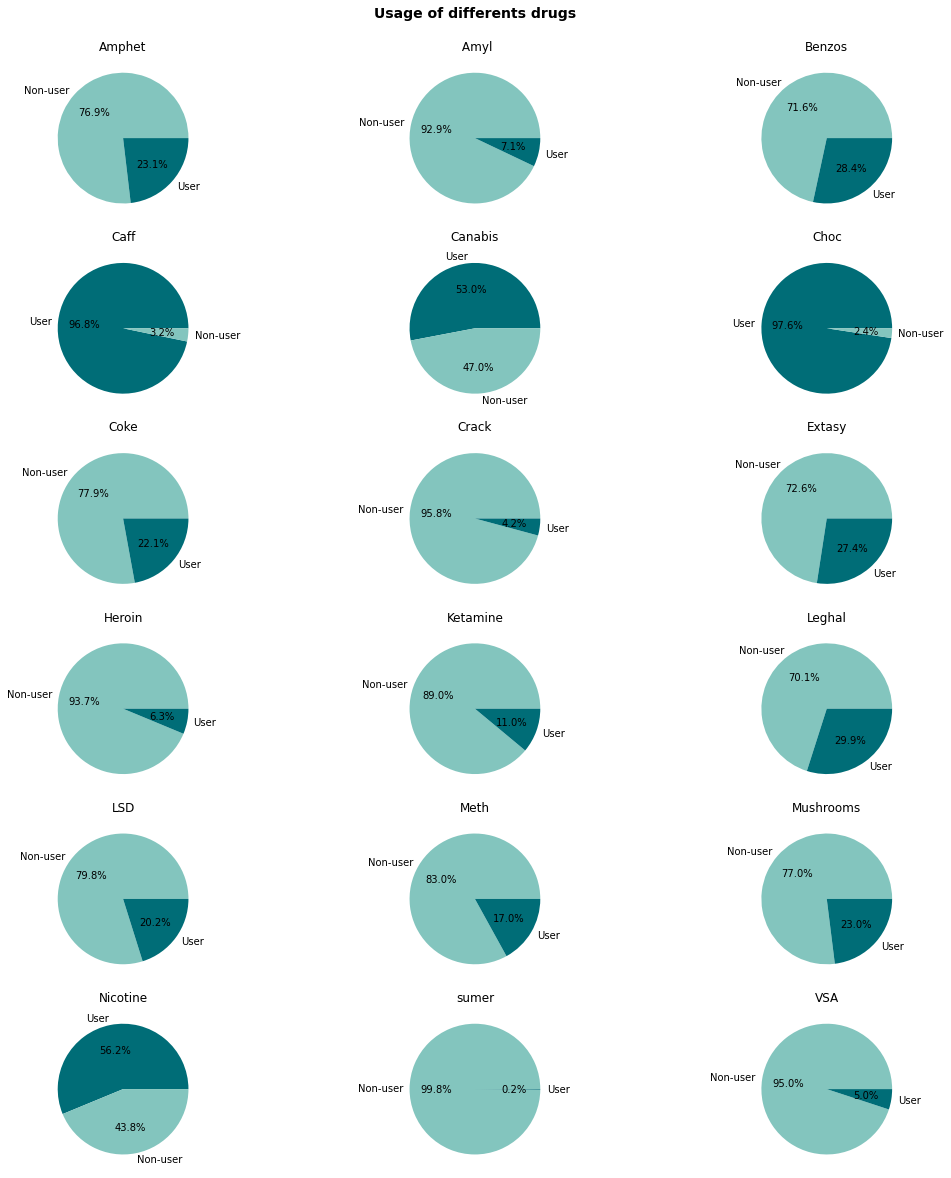

In [13]:
#if categories :
color = {'User':  '#006d77',
          'Non-user': '#83c5be'}

fig, axes = plt.subplots(6,3,figsize = (16,16))
fig.suptitle('Usage of differents drugs',fontsize=14, y=1.02,weight='black')  
k=1
for i in range(6):
    for j in range(3):
        labels = drug_consumption_viz[drugs_columns[k]].value_counts().index.tolist()
        axes[i][j].pie(x=drug_consumption_viz[drugs_columns[k]].value_counts(), autopct='%.1f%%', shadow=False,labels=labels,colors=get_liste_couleur(labels,color))
        axes[i][j].set_title(drugs_columns[k])
        k+=1

#axes[0][0].legend(title='Usage',labels=['Used','Never used'])
plt.tight_layout()
plt.show()

We can observe a widely
disparate representation of
user/non-user for illegal and
legal drugs.
Fisrt, we can spot a small
proportion of cheater 0.2%, but
because it may add noise we
will get rid of this column in our
futur prediction.
Then we can see that the illegal
drug the most used is the
Cannabis with up to 47% of
users, this drug is weel-known
as a Getaway drug.

 *A gateway drug is a habitforming drug that can lead to
the use of other, more addictive
drugs. They include alcohol,
marijuana, nicotine, and
prescription drugs.*

It would be interesting to see the repartition within all the dataset of users of different categories. 



---


⚡  **This part is also important for the Machine Learning part** ⚡


*   **['Illegal drug user/non-user']:** We splitted the drug consumption in **two categories**, if the drog was used up to last year, the individual is considered as an user, otherwise it's a non-user. 
*  **['Illegal drug user'] :** We splitted the drug consumption in the CLO to CL6 categories by getting the **maximum consumption** for each illegal drog for each individual exept sumer sich is a fake illegal drug.


---




In [14]:
drugs_illegal[:-1] #we take all ilegal drugs except sumer

# for the next part of our data let's create two more catgories
#get the max of consumption for each illegal druf for an individual
drug_consumption['Illegal drug use']=drug_consumption[drugs_illegal[:-1]].max(axis=1)
drug_consumption_viz['Illegal drug use']=drug_consumption[drugs_illegal[:-1]].max(axis=1)
#print(drug_consumption.loc[drug_consumption['Illegal drug use'] == 'CL0'])
#do the almost the same but paritionning betwenn user/non-user
drug_consumption['Illegal drug user/non-user']=drug_consumption_viz[drugs_illegal[:-1]].max(axis=1)
drug_consumption_viz['Illegal drug user/non-user']=drug_consumption_viz[drugs_illegal[:-1]].max(axis=1)
#print(drug_consumption_ml.loc[drug_consumption_ml['Illegal drug user/non-user'] == 'Non-user'])

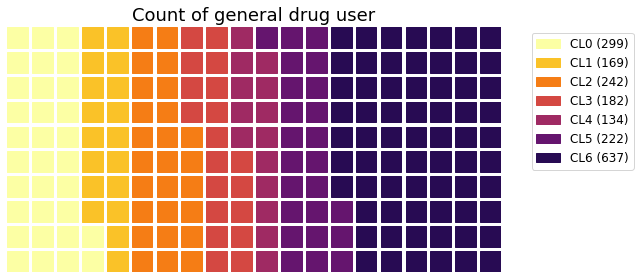

In [15]:
#waffle chart
#Propottion of drug user within the whole dataset
df = drug_consumption.groupby('Illegal drug use').size().reset_index(name='counts')
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df['counts'],
            'labels': ["{0} ({1})".format(n[1], n[2]) for n in df[['Illegal drug use', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': 'Count of general drug user', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=10,
    columns=20,
    colors=colors,
    figsize=(9, 9)
)

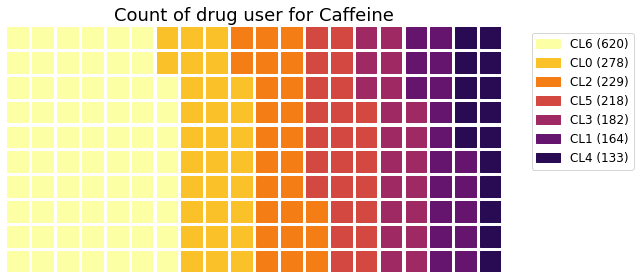

In [16]:
df =drug_consumption_viz[drug_consumption_viz['Caff']=='User']['Illegal drug use'].value_counts().to_frame()
df=df.reset_index()
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df['Illegal drug use'],
             'labels': ["{0} ({1})".format(n[1], n[2]) for n in df[['index','Illegal drug use']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': 'Count of drug user for Caffeine', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=10,
    columns=20,
    colors=colors,
    figsize=(9, 9)
)

We ploted the proportion of different categories of drugs usage within the dataset. We can
see a widely disparate representation of thoses classes, with a majority of users with usage up to a year
(rf Machine Learning part). Before studying the Getaway drugs we also ploted a waffle chart
for Caffeine as a referent.

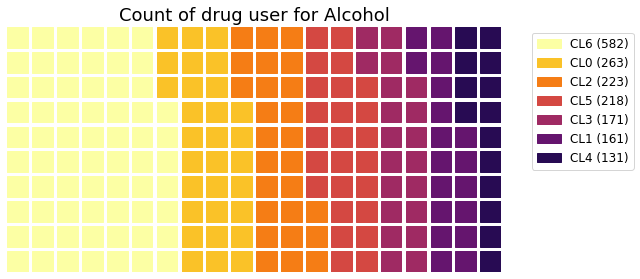

In [17]:
#Getaway drug analysis : Alcohol
df =drug_consumption_viz[drug_consumption_viz['Alchool']=='User']['Illegal drug use'].value_counts().to_frame()
df=df.reset_index()
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df['Illegal drug use'],
             'labels': ["{0} ({1})".format(n[1], n[2]) for n in df[['index','Illegal drug use']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': 'Count of drug user for Alcohol', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=10,
    columns=20,
    colors=colors,
    figsize=(9, 9)
)

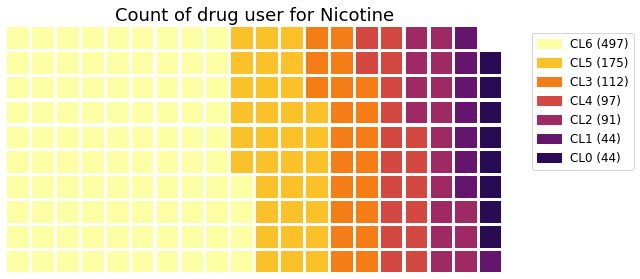

In [18]:
#Getaway drug analysis : Nicotine
df =drug_consumption_viz[drug_consumption_viz['Nicotine']=='User']['Illegal drug use'].value_counts().to_frame()
df=df.reset_index()
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df['Illegal drug use'],
             'labels': ["{0} ({1})".format(n[1], n[2]) for n in df[['index','Illegal drug use']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': 'Count of drug user for Nicotine', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=10,
    columns=20,
    colors=colors,
    figsize=(9, 9)
)

We can observe here that the
Getaway drugs Nicotine &
Alcohol seems to have a more
highly count of illegal drug
user.
However, we didn’t get the
timeline for each participants of
their consumption, so it’s
complicated to say if the use of
alchool could impact the use of
Amphets for example or the other way.
We will see those correlations
more detailed in the Machine
Learning part, but it do seems
that the consumption of
Nicotine or Alchool is strongly
correlated with the
consumption of others illegal
drugs.

## Demographic data


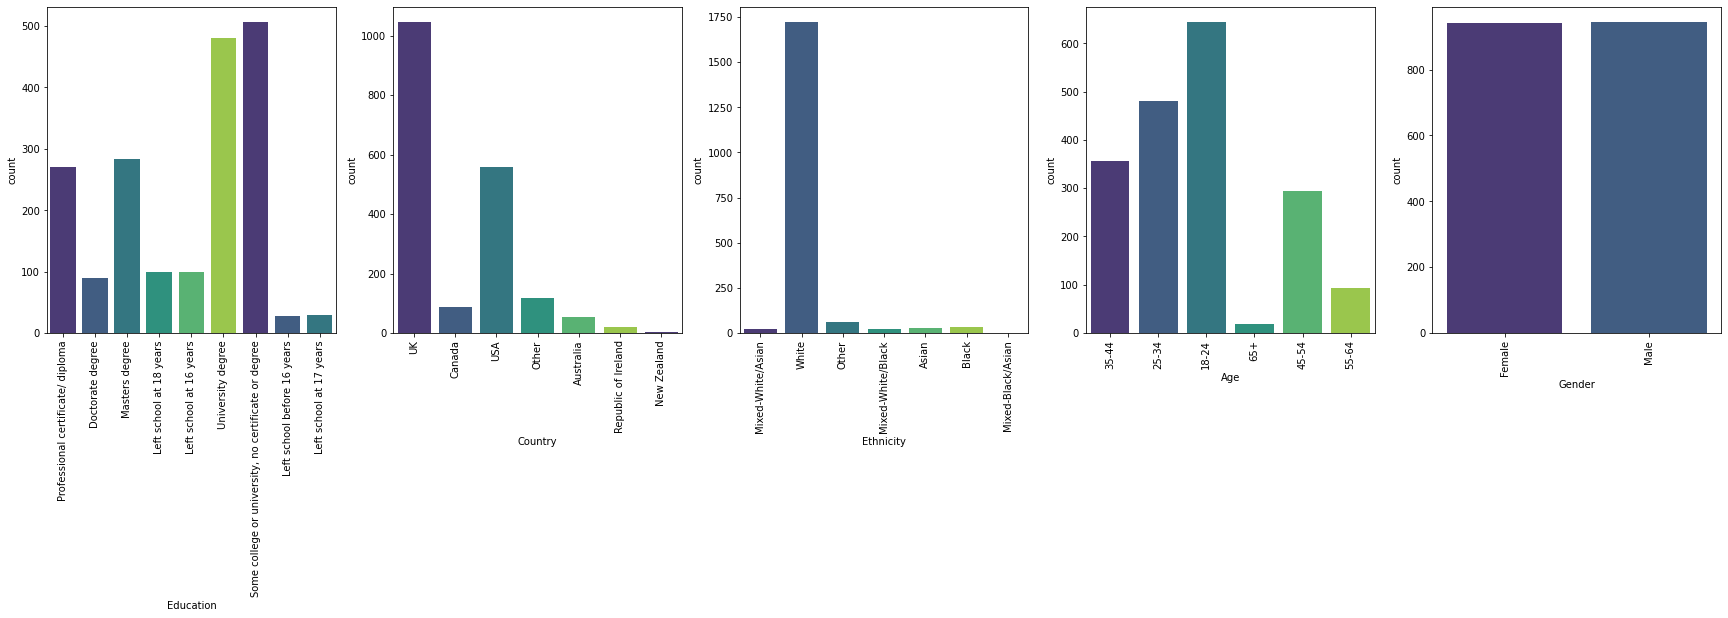

In [19]:
#demographic data
demographic_columns_name=['Education','Country','Ethnicity','Age','Gender']
fig, ax =plt.subplots(1,5,figsize=(30,6))
k=0
for i in range(5):
  color=sns.color_palette("viridis")
  sns.countplot(data=drug_consumption_viz,x=demographic_columns_name[k],ax=ax[i],palette=color)
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90,fontsize=10)
  k+=1

plt.show()

Some categories are almost uniformaly disparate such as **Education** and **Age** or
even equally represented wich **Gender**. We can observe some unevenly represented categories within the columns of the Dataframe, suchs as
Ethnicity that count up to 90% of white or Country with mostly UK participants. 

In [20]:
percent_df_country = (drug_consumption_viz[demographic_columns_name[1]].value_counts()/drug_consumption_viz[demographic_columns_name[1]].count())*100
percent_df_country.to_frame()

Country
UK                   55.384615
USA                  29.549072
Other                 6.259947
Canada                4.615385
Australia             2.864721
Republic of Ireland   1.061008
New Zealand           0.265252

In [21]:
percent_df_ethnicity = (drug_consumption_viz[demographic_columns_name[2]].value_counts()/drug_consumption_viz[demographic_columns_name[2]].count())*100
percent_df_ethnicity.to_frame()

Ethnicity
White              91.246684
Other               3.342175
Black               1.750663
Asian               1.379310
Mixed-White/Black   1.061008
Mixed-White/Asian   1.061008
Mixed-Black/Asian   0.159151

In [22]:
#How much fraud is there
percent_df_fraudes = (drug_consumption_viz['sumer'].value_counts()/drug_consumption_viz['sumer'].count())*100
percent_df_fraudes.to_frame()

sumer
Non-user  99.840849
User       0.159151

We can see that there is a huge difference in the peoples represented in the dataset , they are mainly white from 18-24 from UK and mostly educated. The only demographic column that doesn't show a huge difference in his categories is the Gender. We can observe an alomst 50/50 repartition of the male/female.


Let's study in details the parameters of user/ non user :
* user/non-user by age 
* user/non-user by gender
* user/non-user by education level

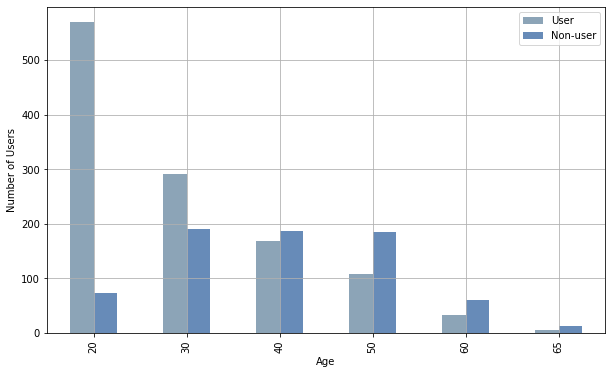

In [23]:
age=pd.concat([drug_consumption_viz[drug_consumption_viz['Illegal drug user/non-user'] == 'User']['Age'].value_counts(),drug_consumption_viz[drug_consumption_viz['Illegal drug user/non-user'] == 'Non-user']['Age'].value_counts()],axis=1,keys=['User','Non-user'])
age.rename(index={'18-24': '20','25-34': '30','35-44': '40','45-54': '50','55-64': '60','65+': '65'})

AgePlot = age.plot(kind='bar',figsize=(10,6),alpha=0.6,grid=True,color=['#406788','#023e8a'])
AgePlot.set(ylabel = 'Number of Users', xlabel='Age')

AgeLabels = ['20','30','40','50','60','65']
AgePlot.set_xticklabels(AgeLabels)
AgePlot;

The majority of user are in their 20ies. We can see that when the population get older it seems that the average number of user decrease. So the usage of illegal drugs is negatively correlated to the age. But let's not forget the disparity of represetations wich can false this conclusion.

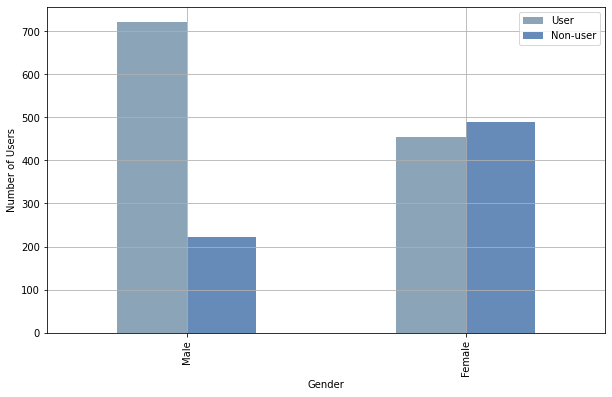

In [24]:
gender=pd.concat([drug_consumption_viz[drug_consumption_viz['Illegal drug user/non-user'] == 'User']['Gender'].value_counts(),drug_consumption_viz[drug_consumption_viz['Illegal drug user/non-user'] == 'Non-user']['Gender'].value_counts()],axis=1,keys=['User','Non-user'])

GenderPlot = gender.plot(kind='bar',figsize=(10,6),alpha=0.6,grid=True,color=['#406788','#023e8a'])
GenderPlot.set(ylabel = 'Number of Users', xlabel='Gender')

GenderLabels = ['Male','Female']
GenderPlot.set_xticklabels(GenderLabels)
GenderPlot;

The repatition of the user/non-user by gender shows a majority of male users compared to the range of female users.

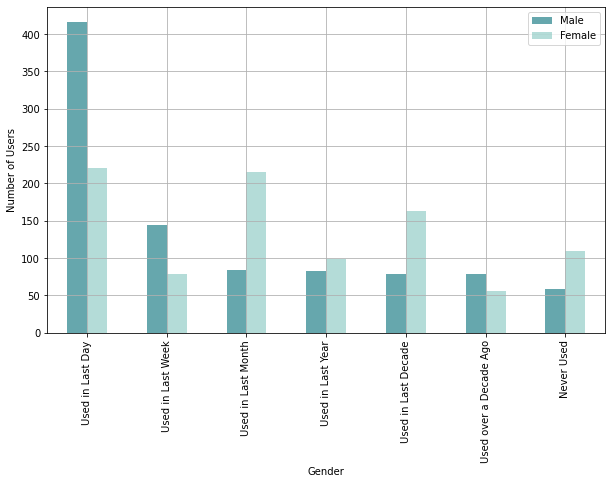

In [25]:
gender=pd.concat([drug_consumption_viz[drug_consumption_viz['Gender'] == 'Male']['Illegal drug use'].value_counts(),drug_consumption_viz[drug_consumption_viz['Gender'] == 'Female']['Illegal drug use'].value_counts()],axis=1,keys=['Male','Female'])

GenderPlot = gender.plot(kind='bar',figsize=(10,6),alpha=0.6,grid=True,color=['#006d77','#83c5be'])
GenderPlot.set(ylabel = 'Number of Users', xlabel='Gender')

GenderLabels = ['Used in Last Day','Used in Last Week','Used in Last Month','Used in Last Year','Used in Last Decade','Used over a Decade Ago','Never Used']
GenderPlot.set_xticklabels(GenderLabels)
GenderPlot;

Because men and women are equally represented we can make some conclusions reading this plot. We can see that there is a difference of usage between the genders. Men are the majority of daily users of drugs while women are in majority for all of the other kind of use.

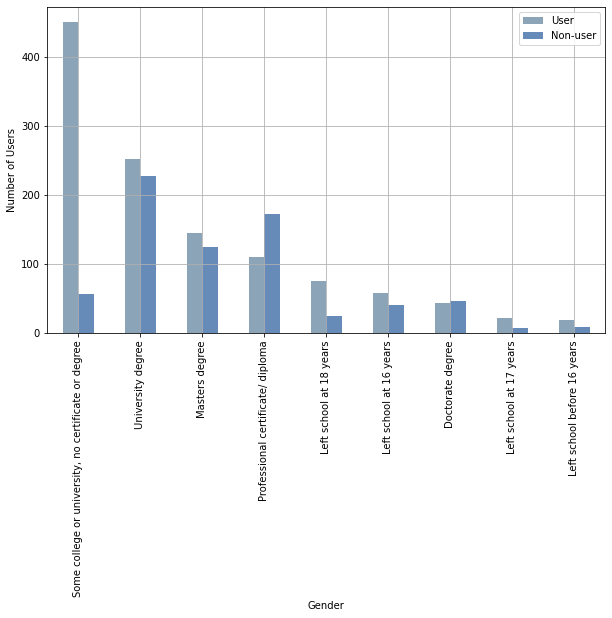

In [26]:
#user/non-user by education level
education=pd.concat([drug_consumption_viz[drug_consumption_viz['Illegal drug user/non-user'] == 'User']['Education'].value_counts(),drug_consumption_viz[drug_consumption_viz['Illegal drug user/non-user'] == 'Non-user']['Education'].value_counts()],axis=1,keys=['User','Non-user'])

EducationPlot = education.plot(kind='bar',figsize=(10,6),alpha=0.6,grid=True,color=['#406788','#023e8a'])
EducationPlot.set(ylabel = 'Number of Users', xlabel='Gender')

EducationLabels = ['Some college or university, no certificate or degree','University degree','Masters degree','Professional certificate/ diploma','Left school at 18 years','Left school at 16 years','Doctorate degree','Left school at 17 years','Left school before 16 years']
EducationPlot.set_xticklabels(EducationLabels)
EducationPlot;

We can see that the majority of the user have a good education level.

## Personality traits 

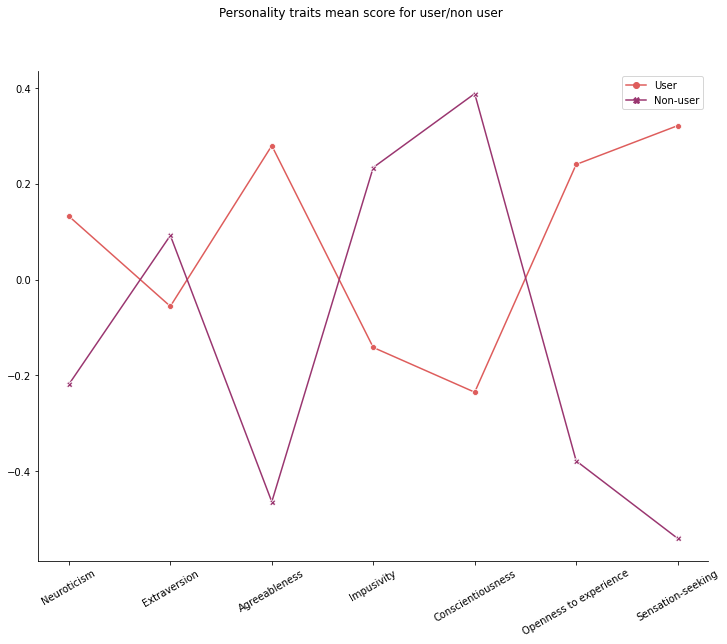

In [27]:
#Personality traits score for user/non user 
#lets create a  new dataframe for an easier plot
rows = []
for i in personality_columns :
    rows.append([drug_consumption_viz[drug_consumption_viz['Illegal drug user/non-user'] == 'User'][i].mean(), drug_consumption_viz[drug_consumption_viz['Illegal drug user/non-user'] == 'Non-user'][i].mean()])
df = pd.DataFrame(rows, columns=["User", "Non-user"],index=['Neuroticism','Extraversion','Agreeableness','Impusivity','Conscientiousness','Openness to experience','Sensation-seeking']) 

#Let's plot this new dataframe
fig, ax = plt.subplots()
fig.suptitle('Personality traits mean score for user/non user ')
fig.set_size_inches(12, 9)
sns.lineplot(data=df,markers=True, dashes=False, palette="flare",sizes=(.25, 2.5))
ax.tick_params(axis='x', rotation=30)
sns.despine()

By creating a new column of user/non-user based on the annual consumption of illegal
drugs, we ploted the mean score for each personality traits for consumers or not
consumers. We can see a strong correlation between the consumption and the changing
behaviour, the personality traits seems to be diametricelly opposed. It’s interesting because we may
argue that it’s drugs use that may change the behaviour of the participants. The 
question of how personality change will affect how we will develop our ML model later.

## Correlation between the features

We need numeral data for an heatmap

In [28]:
for i in drugs_columns:
    drug_consumption[i] = drug_consumption[i].map({'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6})

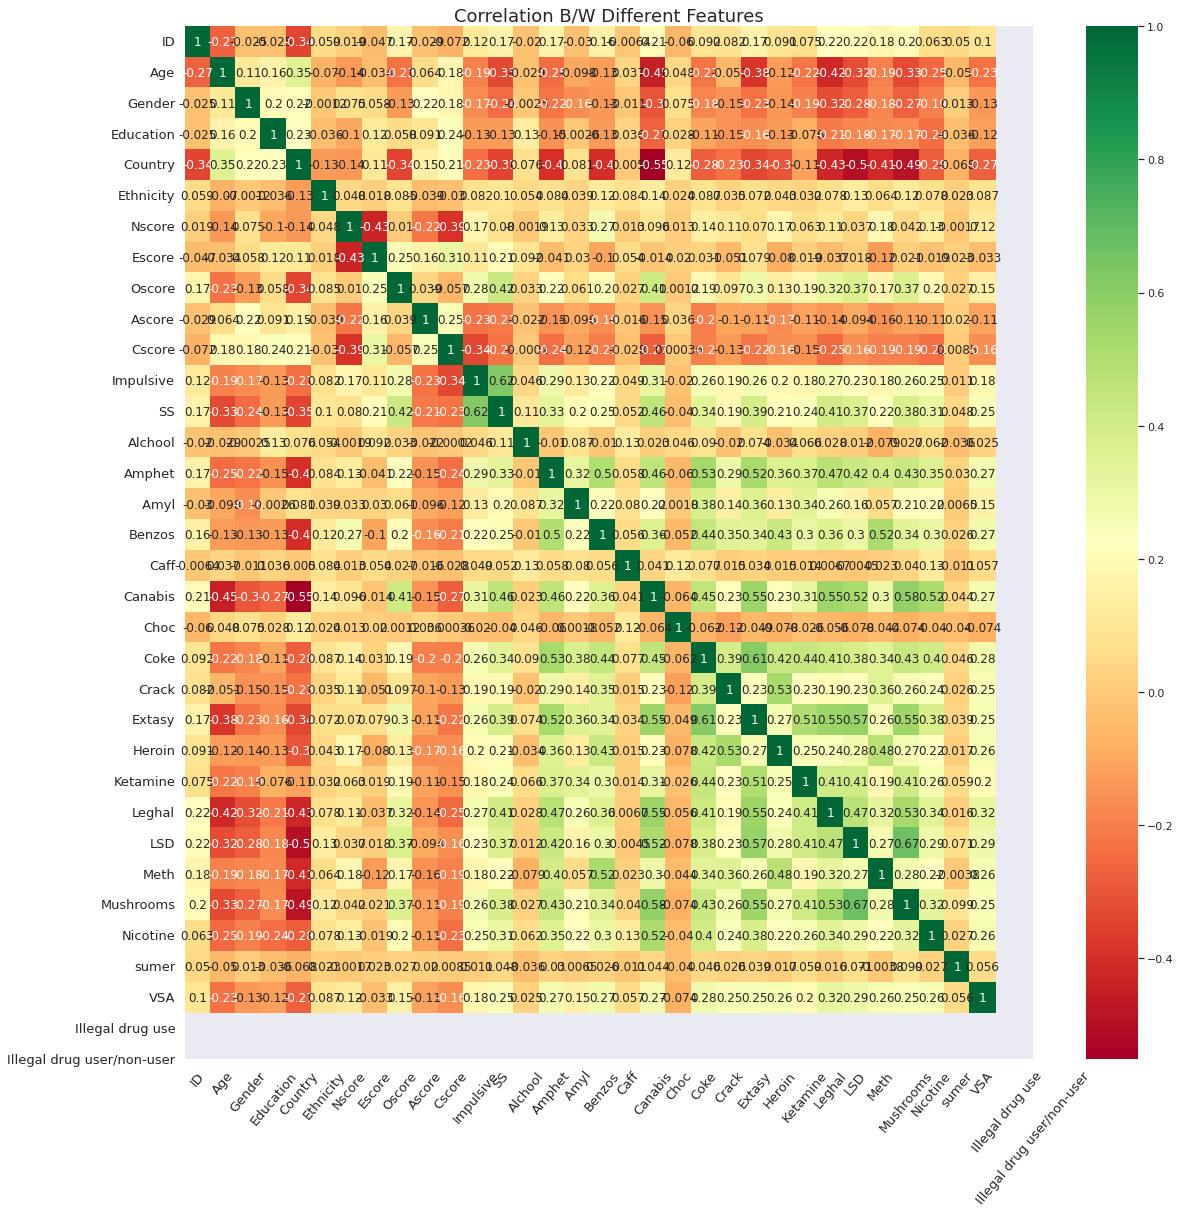

In [29]:
#drugs data
corrmat = drug_consumption.corr()

plt.figure(figsize=(19,19))

sns.set(font_scale=1)
hm = sns.heatmap(corrmat,cmap = 'RdYlGn',annot=True,yticklabels = drug_consumption.columns, xticklabels = drug_consumption.columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13)
plt.title("Correlation B/W Different Features",fontsize=18)
plt.show()

Ethnicity's lack of statistical significant correlations can be explained by the great imbalance in the various possible classes (all whites basically).  Meaning the lack of correlation could be caused by chance. We can observe that the illegal drugs seems higly correlated with other illegal drugs such as Canabis, wich is an argument in favor of the "Getaway drug" theory.

# Cleaning Data (ML prep) 🧹

Before starting the data cleaning, let's reload our dataset.

In [30]:
path =  'https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data'
title=['ID','Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS','Alchool','Amphet',' Amyl','Benzos','Caff','Canabis','Choc','Coke','Crack','Extasy','Heroin','Ketamine','Leghal','LSD','Meth','Mushrooms','Nicotine','sumer','VSA']
drug_consumption = pd.read_csv(path,sep=',',names=title)
drug_consumption.head()

ID      Age   Gender  Education  Country  ...  Meth  Mushrooms  Nicotine  sumer  VSA
0   1  0.49788  0.48246   -0.05921  0.96082  ...   CL0        CL0       CL2    CL0  CL0
1   2 -0.07854 -0.48246    1.98437  0.96082  ...   CL3        CL0       CL4    CL0  CL0
2   3  0.49788 -0.48246   -0.05921  0.96082  ...   CL0        CL1       CL0    CL0  CL0
3   4 -0.95197  0.48246    1.16365  0.96082  ...   CL0        CL0       CL2    CL0  CL0
4   5  0.49788  0.48246    1.98437  0.96082  ...   CL0        CL2       CL2    CL0  CL0

[5 rows x 32 columns]

We sought to answer the following question throughout the study: 

⚡ **"Has the individual with the characteristics X used illegal drugs lately (up to one year)? "** ⚡ 

To respond to this question, we create a new column **['Illegal drug user/non-user']**, we divided drug use into **two categories**: users and non-users. If the substance was taken during the previous year, the individual is deemed a user, otherwise, the individual is considered a non-user. 








In [31]:
drug_consumption['Illegal drug user/non-user']=drug_consumption_viz[drugs_illegal[:-1]].max(axis=1)

In [32]:
drug_consumption.isnull().sum() #0 there is no missing value

ID                            0
Age                           0
Gender                        0
Education                     0
Country                       0
Ethnicity                     0
Nscore                        0
Escore                        0
Oscore                        0
Ascore                        0
Cscore                        0
Impulsive                     0
SS                            0
Alchool                       0
Amphet                        0
 Amyl                         0
Benzos                        0
Caff                          0
Canabis                       0
Choc                          0
Coke                          0
Crack                         0
Extasy                        0
Heroin                        0
Ketamine                      0
Leghal                        0
LSD                           0
Meth                          0
Mushrooms                     0
Nicotine                      0
sumer                         0
VSA     

In [33]:
#encoding because most of our machine learning codes do not understand categorical data
for i in drugs_columns:
    drug_consumption[i] = drug_consumption[i].map({'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6})
    
#or labelencoder (it's the same method)
# for column in drugs_columns:
#     le = LabelEncoder()
#     drug_consumption[column] = le.fit_transform(drug_consumption[column])

In [34]:
# because our variables Age,Gender,... should be categorical, let's change their type 
for i in (demographic_columns+drugs_legal):
  drug_consumption[i]=drug_consumption[i].astype('category')


In [35]:
#we can drop countries
drug_consumption_ml=drug_consumption.copy()
#we drop the ID because it do not provide any important information
drug_consumption_ml.drop(['ID'], axis = 1,inplace=True)
#we drop all values in the illegal drug columns (because it is our output)
drug_consumption_ml.drop(drugs_illegal, axis = 1,inplace=True)
drug_consumption_ml

Age   Gender Education  ... Choc Nicotine  Illegal drug user/non-user
0     0.49788  0.48246  -0.05921  ...    5        2                    Non-user
1    -0.07854 -0.48246   1.98437  ...    6        4                        User
2     0.49788 -0.48246  -0.05921  ...    4        0                        User
3    -0.95197  0.48246   1.16365  ...    4        2                        User
4     0.49788  0.48246   1.98437  ...    6        2                        User
...       ...      ...       ...  ...  ...      ...                         ...
1880 -0.95197  0.48246  -0.61113  ...    4        0                        User
1881 -0.95197 -0.48246  -0.61113  ...    4        5                        User
1882 -0.07854  0.48246   0.45468  ...    6        6                        User
1883 -0.95197  0.48246  -0.61113  ...    5        4                        User
1884 -0.95197 -0.48246  -0.61113  ...    6        6                        User

[1885 rows x 17 columns]

In [36]:
#In order to get a binary output 
def binary_transformation(Y):
  for x in range(len(Y)):
   if(Y[x]=='User'):Y[x]=1
   else :Y[x]=0 
  return Y.astype('int')
drug_consumption_ml['Illegal drug user/non-user']=binary_transformation(drug_consumption_ml['Illegal drug user/non-user'])  

Here is the clean dataset for the machine learning part :

In [37]:
drug_consumption_ml

Age   Gender Education  ... Choc Nicotine  Illegal drug user/non-user
0     0.49788  0.48246  -0.05921  ...    5        2                           0
1    -0.07854 -0.48246   1.98437  ...    6        4                           1
2     0.49788 -0.48246  -0.05921  ...    4        0                           1
3    -0.95197  0.48246   1.16365  ...    4        2                           1
4     0.49788  0.48246   1.98437  ...    6        2                           1
...       ...      ...       ...  ...  ...      ...                         ...
1880 -0.95197  0.48246  -0.61113  ...    4        0                           1
1881 -0.95197 -0.48246  -0.61113  ...    4        5                           1
1882 -0.07854  0.48246   0.45468  ...    6        6                           1
1883 -0.95197  0.48246  -0.61113  ...    5        4                           1
1884 -0.95197 -0.48246  -0.61113  ...    6        6                           1

[1885 rows x 17 columns]

# Split and Standardize the data 💻

In [41]:
#Machine learning cleaning and boosting
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [42]:
X=drug_consumption_ml.iloc[:,:-1] # everything except the two last columns
Y=drug_consumption_ml['Illegal drug user/non-user'] #the last column with binary output 

SPLIT

In [43]:
X_train, X_test,y_train,y_test=train_test_split(X, Y, test_size= 0.33)

STANDARDIZE

In [44]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# 5. Machine learning models to predict [...]🔮

In [45]:
#models 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score #compromis entre rappel et précision
from sklearn.metrics import recall_score #taux de vrais +
from sklearn.metrics import precision_score #proportion de prédictions correctes parmi les points que l’on a prédits positifs.
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Logistic Regression

For the base-line model, we consider the multiple linear
regression model from sklearn.linear_model library
LogisticRegression. 
It's a tatistical model that in its basic form uses a logistic function to
model a binary dependent variable, although many more
complex extensions exist. In regression analysis, logistic
regression (or logit regression) is estimating the parameters of
a logistic model (a form of binary regression).


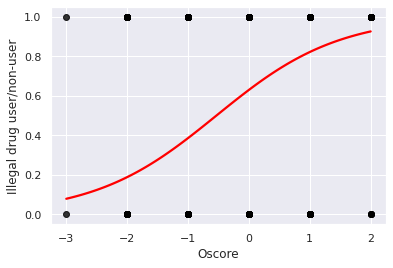

In [46]:
sns.regplot(x=drug_consumption_ml['Oscore'].astype('int'), y=Y, data=drug_consumption_ml, logistic=True, ci=None,scatter_kws={'color': 'black'}, line_kws={'color': 'red'});

In [47]:
algo=LogisticRegression(C=0, penalty='none')
algo.fit(X_train, y_train)
pred = algo.predict(X_test)
accuracy_lr=accuracy_score(y_test, pred)
f_score_lr=f1_score(y_test, pred, average='binary')
recall_lr=recall_score(y_test, pred)
precision_lr=precision_score(y_test, pred)
print('Logistic Regression Accuracy : {0:4f} %'.format(accuracy_score(y_test, pred)*100))

Logistic Regression Accuracy : 85.714286 %


In [48]:
#LogisticRegression().get_params().keys()
def grid_lr():
  grid_params={"C":[0,1,2,3,4],
               "penalty":["l1","l2", 'elasticnet', 'none']}
  grid = GridSearchCV(LogisticRegression(), grid_params, cv=3,n_jobs=-1,scoring='accuracy')            
  grid.fit(X_train,y_train)
  return(grid.best_score_,grid.best_estimator_)

With the grid_lr() method performing a gridsearch we foud out that the best hyperparameters were *(C=0, penalty='none')*

# Linear SVC

The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is.


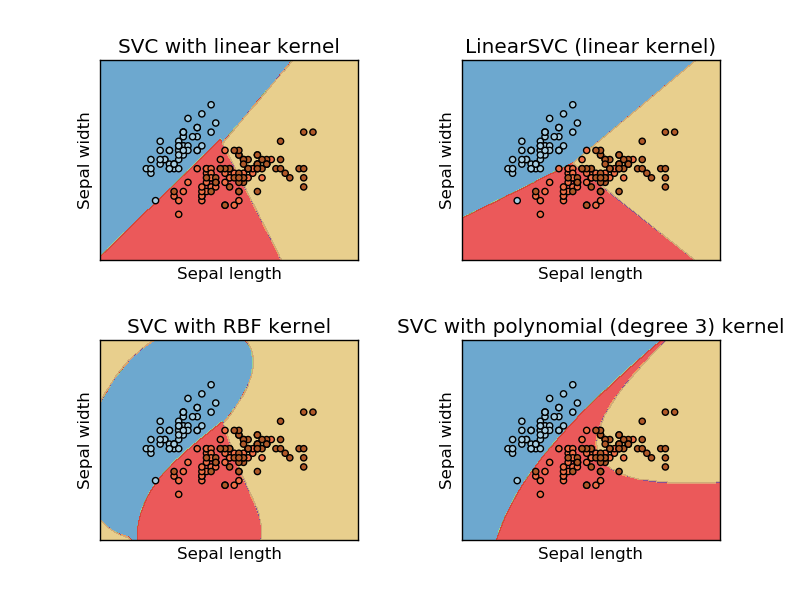

In [49]:
algo=LinearSVC(C=2)
algo.fit(X_train, y_train)
pred = algo.predict(X_test)
accuracy_linearsvc=accuracy_score(y_test, pred)
f_score_linearsvc=f1_score(y_test, pred, average='binary')
recall_linearsvc=recall_score(y_test, pred)
precision_linearsvc=precision_score(y_test, pred)
print('Logistic Regression Accuracy : {0:4f} %'.format(accuracy_score(y_test, pred)*100))

Logistic Regression Accuracy : 86.195827 %


In [50]:
#LinearSVC().get_params().keys()
def grid_linearsvc():
  grid_params={"C":[0,1,2,3,4],
               "penalty":["l1","l2"],
               "loss":["hinge","squared_hinge"],}
  grid = GridSearchCV(LinearSVC(), grid_params, cv=3,n_jobs=-1)            
  grid.fit(X_train,y_train)
  return(grid.best_score_,grid.best_estimator_)

With the grid_linearsvc() method performing a gridsearch we foud out that the best hyperparameters were *(C=2)*

# Gaussian NB

In [51]:
algo=GaussianNB()
algo.fit(X_train, y_train)
pred = algo.predict(X_test)
accuracy_gaussian=accuracy_score(y_test, pred)
f_score_gaussian=f1_score(y_test, pred, average='binary')
recall_gaussian=recall_score(y_test, pred)
precision_gaussian=precision_score(y_test, pred)
print('Logistic Regression Accuracy : {0:4f} %'.format(accuracy_score(y_test, pred)*100))

Logistic Regression Accuracy : 84.590690 %


# Random Forest

The random forest is a classification technique that uses numerous decision trees to classify data. When creating each individual tree, it employs bagging and feature randomization in order to generate an uncorrelated forest of trees whose committee prediction is more accurate than that of any one tree.

In [52]:
algo=RandomForestClassifier(ccp_alpha=0.001, max_depth=9, max_features='log2',n_estimators=200)
# #ccp_alpha=0.002, max_depth=7, max_features='sqrt',min_samples_split=3
#random.seed(10)
algo.fit(X_train, y_train)
pred = algo.predict(X_test)
accuracy_RFC=accuracy_score(y_test, pred)
f_score_RFC=f1_score(y_test, pred, average='binary')
recall_RFC=recall_score(y_test, pred)
precision_RFC=precision_score(y_test, pred)

print('Logistic Regression Accuracy : {0:4f} %'.format(accuracy_score(y_test, pred)*100))

Logistic Regression Accuracy : 84.911717 %


In [53]:
#RandomForestClassifier().get_params().keys()
def grid_rf():
  grid_params={
              'n_estimators':np.arange(100,501,100)
              # 'max_features': ['auto', 'sqrt', 'log2'],
              # 'min_samples_split':[2,3,5],
              # 'min_samples_leaf':[1,5,8],
              # 'ccp_alpha': [0.1, .01, .001,0.002,0.005],
              # 'max_depth' : [1,2,3,4,5, 6, 7, 8, 9]
               }
  grid = GridSearchCV(RandomForestClassifier(ccp_alpha=0.001, max_depth=9, max_features='log2'), grid_params, cv=3,n_jobs=-1,scoring='accuracy')            
  grid.fit(X_train,y_train)
  return(grid.best_score_,grid.best_estimator_)

With the grid_rf() method performing a gridsearch we foud out that the best hyperparameters were *(ccp_alpha=0.001, max_depth=9, max_features='log2',n_estimators=200)*

# Decision Tree


A decision tree is a type of prediction algorithm that operates by asking the inputted data a binary question. Then, depending on the response, it leads to a follow-up inquiry or a final categorization function.

In [54]:
clf_dtc = DecisionTreeClassifier(ccp_alpha=0.002, max_depth=7, max_features='log2',
                        min_samples_leaf=5, min_samples_split=3)
#best ccp_alpha=0.001, max_depth=8, max_features='auto',min_samples_leaf=4,criterion='gini'
clf_dtc.fit(X_train, y_train)
pred = clf_dtc.predict(X_test)

In [55]:
accuracy_dt = accuracy_score(y_test,pred)
f_score_dt=f1_score(y_test, pred, average='binary')
recall_dt=recall_score(y_test, pred, average='binary')
precision_dt=precision_score(y_test, pred, average='binary')
print("Accuracy: %.2f%%" % (accuracy_dt * 100.0))

Accuracy: 80.90%


In [56]:
#DecisionTreeClassifier().get_params().keys()
def grid_dt():
  tree_param = {
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split':[2,3,5],
              'min_samples_leaf':[1,5,8],
              'ccp_alpha': [0.1, .01, .001,0.002,0.005],
              'max_depth' : [1,2,3,4,5, 6, 7, 8, 9],
              'criterion' :['gini']}
  clf=GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)            
  clf.fit(X_train,y_train)
  return(clf.best_score_,clf.best_estimator_)

With the grid_dt() method performing a gridsearch we foud out that the best hyperparameters were *(ccp_alpha=0.002, max_depth=7, max_features='log2',
                        min_samples_leaf=5, min_samples_split=3)*

# KNN

A k-nearest-neighbor algorithm is a data categorization method that assesses how likely a data point is to belong to one of two groups based on which group the data points closest to it belong to.

In [88]:
clf = KNeighborsClassifier(metric='manhattan', weights='distance',p=1,n_neighbors=10)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

In [89]:
accuracy_knn = accuracy_score(y_test,pred)
f_score_knn=f1_score(y_test, pred, average='binary')
recall_knn=recall_score(y_test, pred, average='binary')
precision_knn=precision_score(y_test, pred, average='binary')
print("Accuracy: %.2f%%" % (accuracy_knn * 100.0))

Accuracy: 83.15%


In [59]:
#KNeighborsClassifier().get_params().keys()
def grid_knn():
  grid_params={'n_neighbors':[3,5,10],
             'leaf_size':[30,50,100],
             'weights':['uniform','distance'],
             'metric':['euclidean','manhattan'],
             'p':[1,2]}
  grid = GridSearchCV(KNeighborsClassifier(), grid_params, cv=3,n_jobs=-1,scoring='accuracy')            
  grid.fit(X_train,y_train)
  return(grid.best_score_,grid.best_estimator_)

With the grid_knn() method performing a gridsearch we foud out that the best hyperparameters were (metric='manhattan', weights='distance',p=1,n_neighbors=10)

# XGBOOST

Xgboost is the abbreviation for eXtreme Gradient Boosting. It alludes to the technical objective of pushing the computational resources for boosted tree algorithms to their limits.

In [60]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [95]:
#Create a basic model
model = xgb.XGBClassifier()

In [175]:
def grid_xgb():
  colsample_bytree = np.arange(0.6,1.1,0.1)
  learning_rate = np.arange(0.006,0.015,0.002)
  # min_child_weight = [10, 5,15,25,20]
  # scale_pos_weight = [1, 2,3]
  subsample = [0.8, 1.0]
  n_estimators = np.arange(200,301,50)
  # max_depth = [3,5,7]

  param_grid = dict(
    colsample_bytree=colsample_bytree,
    learning_rate=learning_rate,
    # min_child_weight=min_child_weight,
    # scale_pos_weight=scale_pos_weight,
    subsample=subsample,
    n_estimators=n_estimators,
    # max_depth=max_depth
    )
  model = xgb.XGBClassifier(random_state=1, verbosity=1)

  grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='accuracy',
                            verbose=True,
                             cv=3
                           )
  best_model = grid_search.fit(X_train, y_train)
  return('Optimum parameters',best_model.best_params_)

In [183]:
xg_reg = xgb.XGBClassifier(objective ='binary:hinge', colsample_bytree = 0.7, learning_rate = 0.012,subsample=0.8, n_estimators= 250)

For the XGBOOST we performed the Gridsearch and foud at that the best hyperparameters were *('colsample_bytree': 0.7,'learning_rate': 0.012,'n_estimators': 250,'subsample': 0.8)*

In [184]:
xg_reg.fit(X_train,y_train.astype(object))
preds = xg_reg.predict(X_test)

In [185]:
accuracy_xgb = accuracy_score(y_test, preds.astype(int))
f_score_xgb=f1_score(y_test, preds.astype(int), average='binary')
recall_xgb=recall_score(y_test, preds.astype(int), average='binary')
precision_xgb=precision_score(y_test, preds.astype(int), average='binary')
print("Accuracy: %.2f%%" % (accuracy_xgb * 100.0))

Accuracy: 85.39%


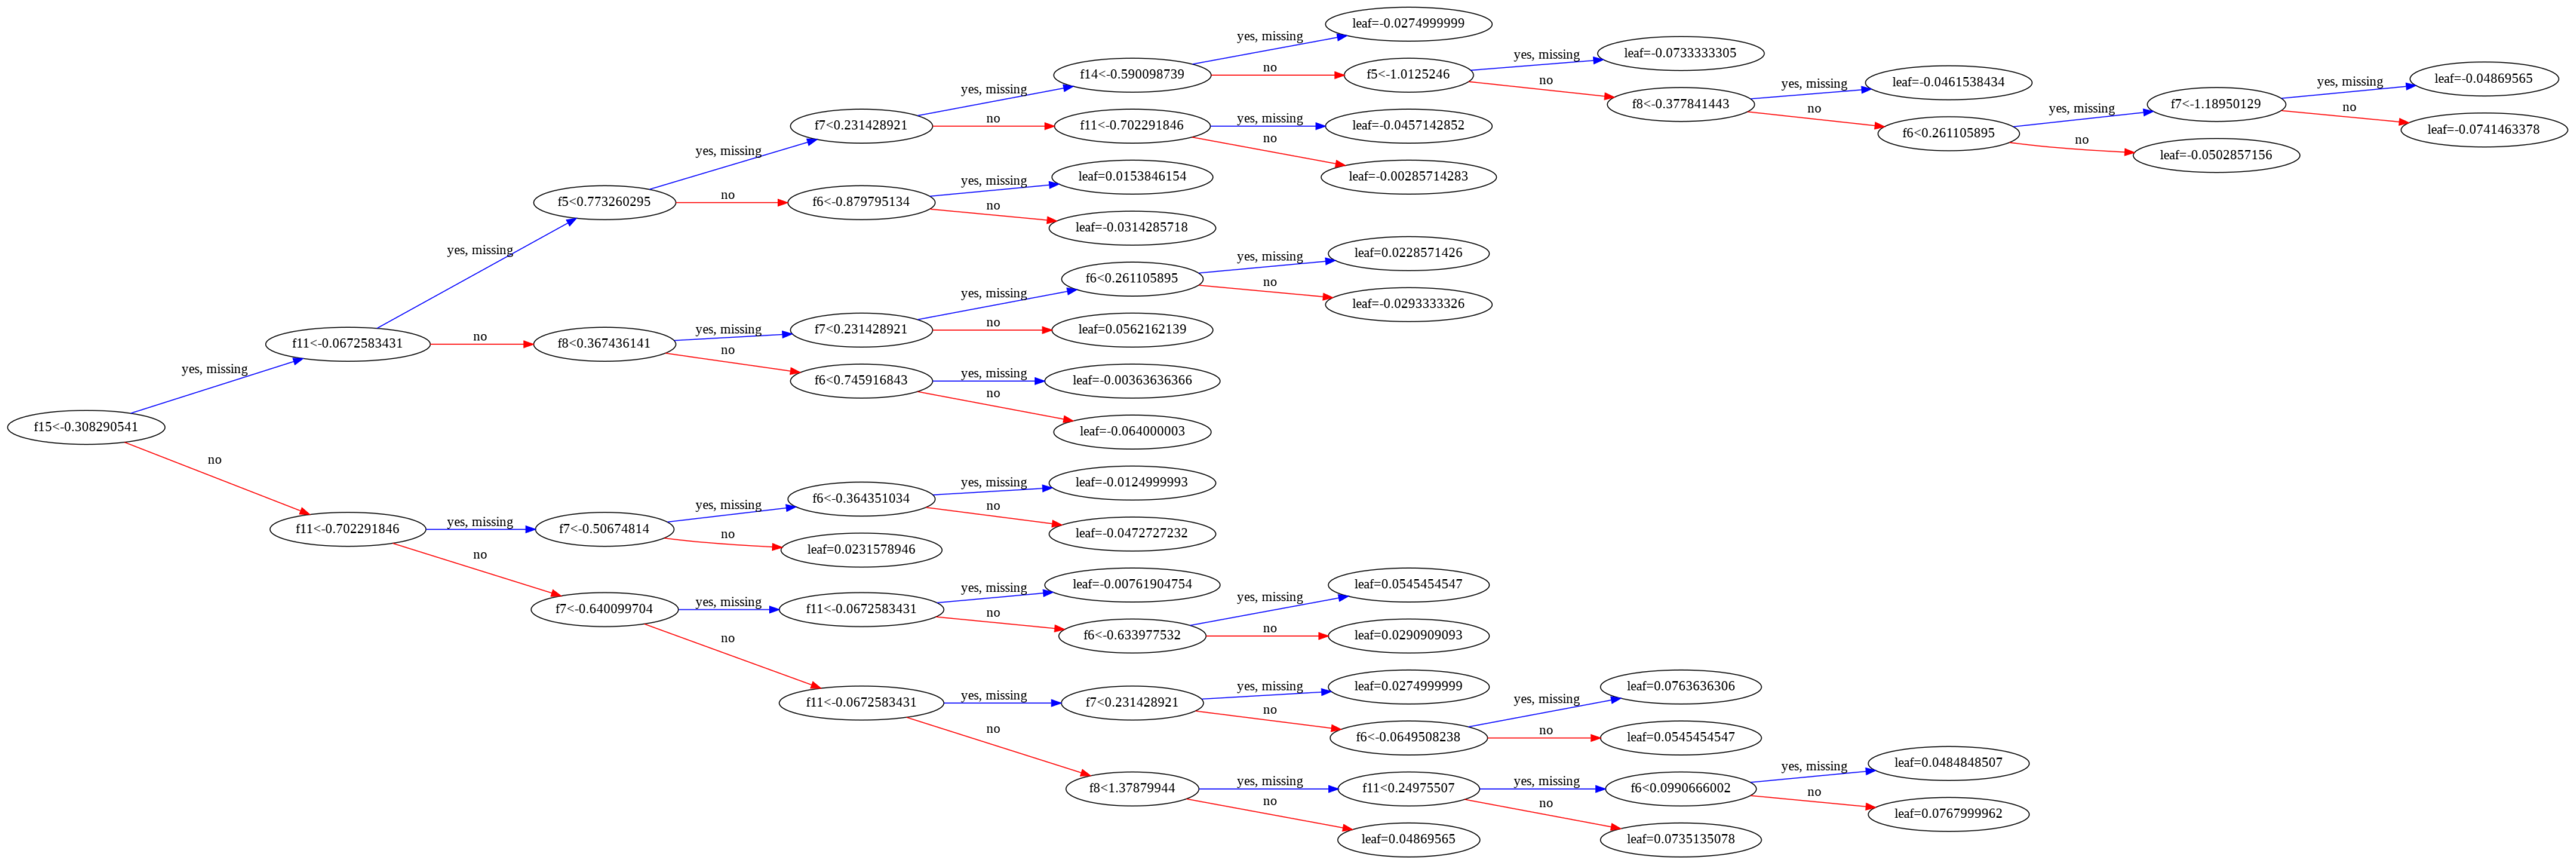

In [66]:
!pip install graphviz
from xgboost import plot_tree
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 80,50
plot_tree(xg_reg, rankdir='LR')
plt.show()

# SVM

Vector Machine, or SVM, is a linear model that may be used to solve classification and regression issues. It can handle both linear and nonlinear problems and is useful for a wide range of applications. SVM is a basic concept: The method divides the data into classes by drawing a line or hyperplane.


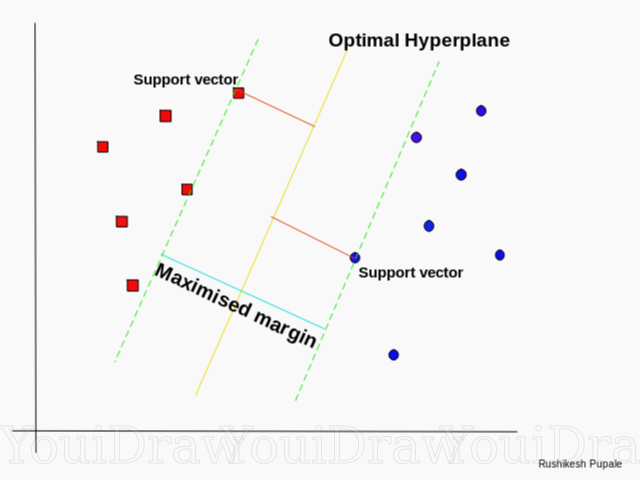

In [93]:
svm = SVC(kernel="rbf", C=0.1, gamma=0.01)
svm.fit(X_train,y_train)
pred = svm.predict(X_test)

In [94]:
accuracy_svm = accuracy_score(y_test,pred)
f_score_svm=f1_score(y_test, pred, average='binary')
recall_svm=recall_score(y_test, pred, average='binary')
precision_svm=precision_score(y_test, pred, average='binary')
print("Accuracy: %.2f%%" % (accuracy_svm * 100.0))

Accuracy: 84.27%


In [69]:
# C: It is the regularization parameter, C, of the error term.
# kernel: It specifies the kernel type to be used in the algorithm. It can be ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’, or callable. The default value is ‘rbf’.
# degree: It is the degree of the polynomial kernel function (‘poly’) and is ignored by all other kernels. The default value is 3.
# gamma: It is the kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’. If gamma is ‘auto’, then 1/n_features will be used instead.

def grid_svc():
  parameters = {
    'C':[0.1,1,100,1000], 
    'kernel':['rbf'],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
  grid=GridSearchCV(SVC(),parameters,n_jobs=-1)
  grid.fit(X_train,y_train)
  return(grid.best_score_,grid.best_estimator_) 

With the grid_svc() method performing a gridsearch we foud out that the best hyperparameters were *(C=0.1, gamma=0.01)*




# Réseau de neurones 

Neural networks, in their most basic form, are self-optimizing functions that map inputs to desired outputs. After that, the function may accept a new input and predict a result using the function it learned from the training data.

In [ ]:
!pip install tensorflow

In [71]:
from keras.models import Sequential
# first neural network with keras tutorial
from numpy import loadtxt
import keras
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing.text import Tokenizer

In [72]:
model = Sequential()
model.add(Dense(12, input_dim=16, activation='relu'))#16 if country and ethnicity not deleted
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [73]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy']) #loss binary_crossentropy #mean_squared_error

In [ ]:
model.fit(X_train, y_train, epochs=150, batch_size=10) 
#test the model
#test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
#print('\nTest accuracy:', test_acc)
predictions = model.predict(X_test)
pred = (predictions > 0.5)

In [75]:
accuracy_rdn= accuracy_score(y_test,pred)
f_score_rdn=f1_score(y_test, pred, average='binary')
recall_rdn=recall_score(y_test, pred, average='binary')
precision_rdn=precision_score(y_test, pred, average='binary')
print("Accuracy: %.2f%%" % (accuracy_rdn * 100.0))

Accuracy: 84.75%


# Conclusion : Which one is the best model ? 🥇

In [186]:
#On crée un disctionnaire de nos scores :accuracy, recall et precision
score_dico={
    'Logistic Regression':[accuracy_lr,f_score_lr,recall_lr,precision_lr],
    'Linear SVC':[accuracy_linearsvc,f_score_linearsvc,recall_linearsvc,precision_linearsvc],
    'Gaussian NB':[accuracy_gaussian,f_score_gaussian,recall_gaussian,precision_gaussian],
    'Random forest classifier':[accuracy_RFC,f_score_RFC,recall_RFC,precision_RFC],
    'Decision Tree classifier':[accuracy_dt,f_score_dt,recall_dt,precision_dt],
    'KNN':[accuracy_knn,f_score_knn,recall_knn,precision_knn],
    'XGBOOST':[accuracy_xgb,f_score_xgb,recall_xgb,precision_xgb],
    'Réseau de neurones':[accuracy_rdn,f_score_rdn,recall_rdn,precision_rdn] }  

In [190]:
dataframe=pd.DataFrame.from_dict(score_dico,orient='index')
#dataframe.index/dataframe.values
dataframe.sort_values(by=2,ascending=True,inplace=True)
dataframe.rename(columns={0: 'Accuracy',1:'F_score',2:'Recall',3:'Precision'},inplace=True)
dataframe

Accuracy   F_score    Recall  Precision
Decision Tree classifier  0.808989  0.848020  0.827930   0.869110
KNN                       0.831461  0.864865  0.837905   0.893617
Gaussian NB               0.845907  0.875648  0.842893   0.911051
Réseau de neurones        0.847512  0.878361  0.855362   0.902632
Random forest classifier  0.849117  0.880711  0.865337   0.896641
Logistic Regression       0.857143  0.887484  0.875312   0.900000
Linear SVC                0.861958  0.890863  0.875312   0.906977
XGBOOST                   0.853933  0.885822  0.880299   0.891414

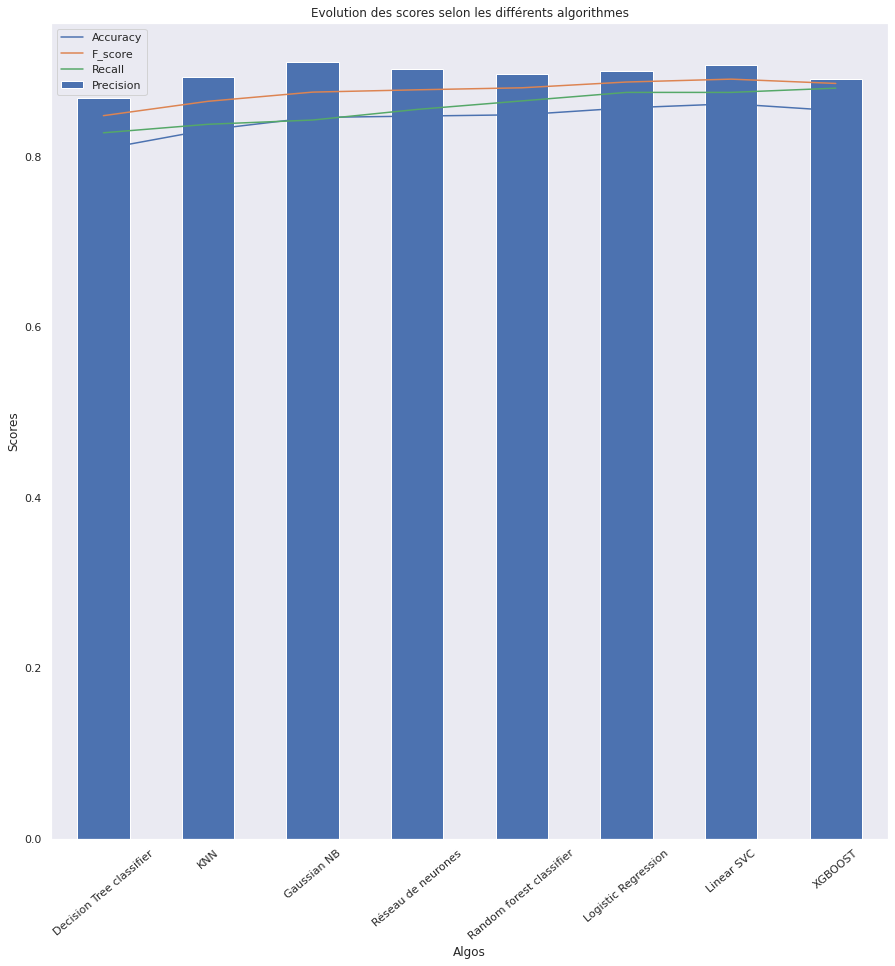

In [191]:
ax = plt.gca()
plt.rcParams["figure.figsize"] = (15,15)
plt.title("Evolution des scores selon les différents algorithmes")
plt.subplot()
#Courbes
dataframe.plot(kind='line', y='Accuracy',ax=ax)
dataframe.plot(kind='line', y='F_score',ax=ax)
dataframe.plot(kind='line', y='Recall',ax=ax)
dataframe.plot(kind='bar', y='Precision',ax=ax)
plt.xticks(range(len(dataframe.index)), dataframe.index,rotation=40)
#labels
plt.ylabel('Scores')
plt.xlabel('Algos')
#plot
plt.grid()
plt.show()


The purpose of our forecasts is to predict whether someone will be a drug user or not. Especially, we want our algorithm to allow professionals such as psychologists etc. to identify actual users or futur ones. To do so, we aim to **lower the False positives rate** and maximize our **recall**. However, we'll also keep an eye on other measures like accuracy, precision, and, as a result, the f1-score (wich is the report between recall and precision)

As we can analyse the best results from our Machine learning exploration were on with the **XGBOOST** model , then the **Linear SVC** and finally the **Logistic Regression**.